<a href="https://colab.research.google.com/github/HEMASAGAR07/CODSOFT/blob/main/CUSTOMER_CHURN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay



In [ ]:
# Load the dataset
churn_prediction = pd.read_csv('/content/Churn_Modelling.csv')


In [ ]:
churn_prediction.head

<bound method NDFrame.head of       creditscore  age  tenure    balance  numofproducts  hascrcard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      isactivemember  estimatedsalary  exited  geography_Germany  \
0                  1        101348.88       1    

In [ ]:
churn_prediction.shape

(10000, 12)

In [ ]:
churn_prediction.size

120000

In [ ]:
churn_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   creditscore        10000 non-null  int64  
 1   age                10000 non-null  int64  
 2   tenure             10000 non-null  int64  
 3   balance            10000 non-null  float64
 4   numofproducts      10000 non-null  int64  
 5   hascrcard          10000 non-null  int64  
 6   isactivemember     10000 non-null  int64  
 7   estimatedsalary    10000 non-null  float64
 8   exited             10000 non-null  int64  
 9   geography_Germany  10000 non-null  uint8  
 10  geography_Spain    10000 non-null  uint8  
 11  gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


In [ ]:
churn_prediction.columns

Index(['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited', 'geography_Germany',
       'geography_Spain', 'gender_Male'],
      dtype='object')

In [ ]:
churn_prediction.isnull().sum()

creditscore          0
age                  0
tenure               0
balance              0
numofproducts        0
hascrcard            0
isactivemember       0
estimatedsalary      0
exited               0
geography_Germany    0
geography_Spain      0
gender_Male          0
dtype: int64

In [ ]:
churn_prediction.describe()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='exited', ylabel='count'>

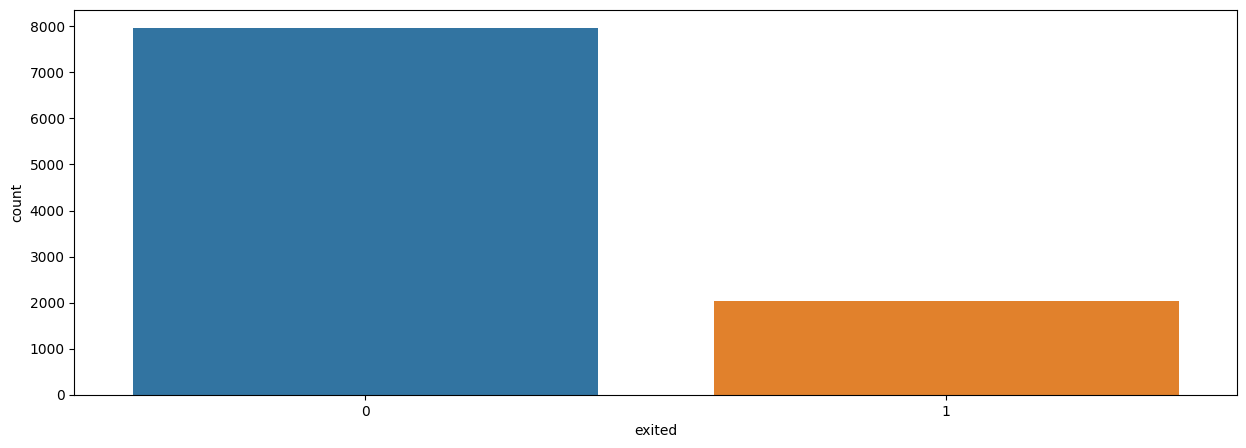

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=churn_prediction,x='exited')

In [ ]:
churn_prediction['exited'].value_counts().to_frame()

,exited
0,7963
1,2037


In [ ]:
# Data cleaning and preprocessing
churn_prediction.columns = churn_prediction.columns.str.strip().str.lower()
churn_prediction.drop(['rownumber', 'customerid', 'surname'], axis=1, inplace=True)

In [ ]:


# Check unique values in 'geography' and 'gender' columns
print(churn_prediction['geography'].unique())
print(churn_prediction['gender'].unique())


['France' 'Spain' 'Germany']
['Female' 'Male']


<Axes: xlabel='exited', ylabel='count'>

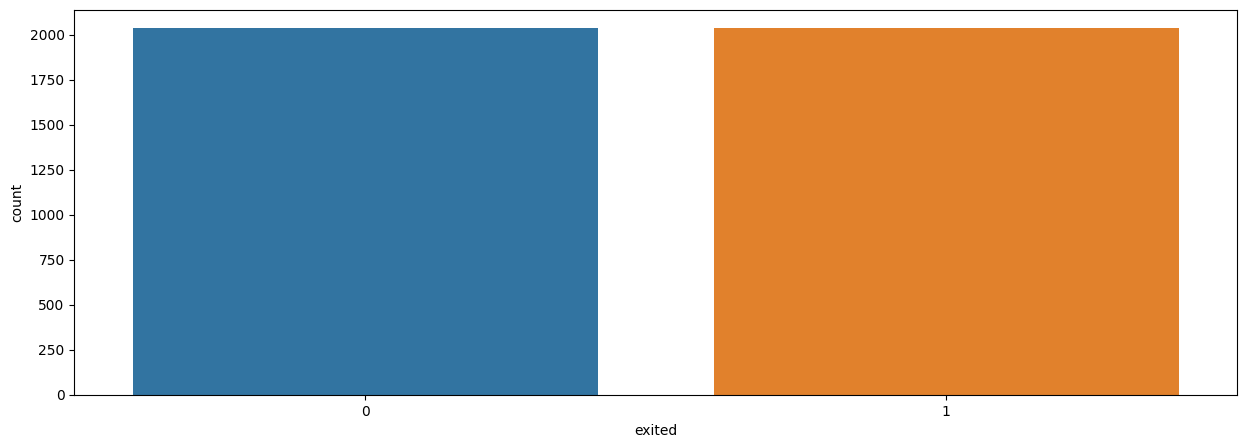

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=churn_prediction_df,x='exited')

In [ ]:

# One-hot encode categorical variables
churn_prediction = pd.get_dummies(churn_prediction, columns=['geography', 'gender'], drop_first=True)

In [ ]:
# Downsample the majority class
churn_prediction_majority = churn_prediction[churn_prediction['exited'] == 0]
churn_prediction_minority = churn_prediction[churn_prediction['exited'] == 1]

In [ ]:
churn_prediction_majority_downsample = resample(churn_prediction_majority, n_samples=2037, replace=False, random_state=42)
churn_prediction_df = pd.concat([churn_prediction_majority_downsample, churn_prediction_minority])

In [ ]:
# Split the data into features (x) and target (y)
x = churn_prediction_df.drop(['exited'], axis=1)
y = churn_prediction_df['exited']


In [ ]:
# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

In [ ]:
# Model Selection and Hyperparameter Tuning
# Logistic Regression
lr_params = {'C': [0.1, 1, 10, 100]}
lr_grid = GridSearchCV(LogisticRegression(max_iter=500), lr_params, cv=5)
lr_grid.fit(x_train, y_train)
best_lr = lr_grid.best_estimator_


In [ ]:
# K-Nearest Neighbors
knn_params = {'n_neighbors': [3, 5, 7, 9]}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_grid.fit(x_train, y_train)
best_knn = knn_grid.best_estimator_

In [ ]:


# Support Vector Classifier
svc_params = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
svc_grid = GridSearchCV(SVC(), svc_params, cv=5)
svc_grid.fit(x_train, y_train)
best_svc = svc_grid.best_estimator_

In [ ]:
# Evaluate the best models
best_lr_accuracy = best_lr.score(x_test, y_test)
best_knn_accuracy = best_knn.score(x_test, y_test)
best_svc_accuracy = best_svc.score(x_test, y_test)


In [ ]:
# Display the results and select the best model
results = {
    'Logistic Regression': best_lr_accuracy,
    'K-Nearest Neighbors': best_knn_accuracy,
    'Support Vector Classifier': best_svc_accuracy
}


In [ ]:

best_model = max(results, key=results.get)
best_accuracy = results[best_model]


In [ ]:

print('Results:')
for model, accuracy in results.items():
    print(f'{model} accuracy: {accuracy:.2f}')

Results:
Logistic Regression accuracy: 0.72
K-Nearest Neighbors accuracy: 0.74
Support Vector Classifier accuracy: 0.77


In [ ]:
print(f'\nBest model: {best_model} with accuracy: {best_accuracy:.2f}')


Best model: Support Vector Classifier with accuracy: 0.77
